## EDA

In [131]:
import pandas as pd
import numpy as np

df = pd.read_csv('DataPreprocessingGraded_dataset.csv')

In [132]:
df.shape

(748, 6)

In [133]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


### Data cleaning

In [134]:
# Counting occurrences of '?' or any other symbol
df.isin(['?']).sum(axis=0)

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [135]:
# Replace ? with NAN
df = df.replace('?', np.NaN)
data = df
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [136]:
df = df.dropna()
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
8,2.0,9.0,2250.0,22.0,NEGATIVE,YES
9,5.0,46.0,11500.0,98.0,NEGATIVE,YES


In [137]:
df.shape

(739, 6)

In [138]:
# Drop non-numeric columns
df = df.drop(['Target'], axis=1)
df.head()

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE
8,2.0,9.0,2250.0,22.0,NEGATIVE
9,5.0,46.0,11500.0,98.0,NEGATIVE


In [139]:
df.dtypes

V1     object
V2     object
V3    float64
V4    float64
V5     object
dtype: object

In [140]:
# Find why V1 is object type
df.V1.unique()

array(['2.0', '0.0', '1.0', '5.0', '4.0', '9.0', '3.0', '12.0', '6.0',
       '11.0', '10.0', '13.0', '8.0', '14.0', '7.0', '16.0', '15.0',
       '23.0', '21.0', '18.0', '22.0', '26.0', '35.0', '38.0', '40.0',
       '74.0', '20.0', '17.0', '25.0', '39.0', '72.0'], dtype=object)

In [141]:
# Convert str values to numeric values for V1 and V2 columns
df[['V1', 'V2']] = df[['V1', 'V2']].apply(pd.to_numeric)
df.dtypes

V1    float64
V2    float64
V3    float64
V4    float64
V5     object
dtype: object

In [142]:
# Unique values of V5 Column
df.V5.unique()

array(['NEGATIVE'], dtype=object)

In [143]:
# DataFrame to feature matix
X = df.to_numpy()
X

array([[2.0, 50.0, 12500.0, 98.0, 'NEGATIVE'],
       [0.0, 13.0, 3250.0, 28.0, 'NEGATIVE'],
       [1.0, 24.0, 6000.0, 77.0, 'NEGATIVE'],
       ...,
       [23.0, 3.0, 750.0, 62.0, 'NEGATIVE'],
       [39.0, 1.0, 250.0, 39.0, 'NEGATIVE'],
       [72.0, 1.0, 250.0, 72.0, 'NEGATIVE']], dtype=object)

In [144]:
# Transform V5 using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

transfomer = ColumnTransformer([
    ('select_first_4', 'passthrough', slice(0, 4)),
    ('oneHotEncoder', OneHotEncoder(), [4]),
])
X = transfomer.fit_transform(X)

In [145]:
X

array([[2.0, 50.0, 12500.0, 98.0, 1.0],
       [0.0, 13.0, 3250.0, 28.0, 1.0],
       [1.0, 24.0, 6000.0, 77.0, 1.0],
       ...,
       [23.0, 3.0, 750.0, 62.0, 1.0],
       [39.0, 1.0, 250.0, 39.0, 1.0],
       [72.0, 1.0, 250.0, 72.0, 1.0]], dtype=object)

In [146]:
# variance each feature
np.var(X, axis=0)

array([65.53130899562534, 33.32189020381922, 2082618.1377387107,
       596.1522263381179, 0.0], dtype=object)

<AxesSubplot:>

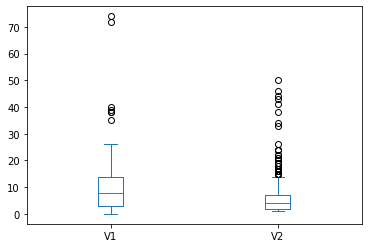

In [147]:
# Box Plot
df[['V1', 'V2']].plot.box()

In [148]:
### Count number of outliers per column

In [149]:
def count_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    IQR = q3 - q1
    return x[x > (q3 + 1.5*IQR)].count() + x[x < (q1 - 1.5*IQR)].count()

In [150]:
count_outliers(df.V1)

7

In [151]:
count_outliers(df.V2)

41

In [152]:
count_outliers(df.V3)

41

In [175]:
count_outliers(df.V4)

0

In [173]:
# What is average of first column after applyting KNNImputer(n_neighbors = 3)?
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

def averageAfterImpute(x):
    transfomer = KNNImputer(n_neighbors=3)
    x = np.reshape(x, (-1, 1))
    return np.average(transfomer.fit_transform(x))
    
averageAfterImpute(data.V1.values)

9.562584118438762